# EE16B - Fall 2018 - Discussion 11A

##  Elad Alon and Miki Lustig

### Interpolation with Basis Functions
Assume there exists a set of functions $\phi_i(x)$ such that
$$
\phi_i(x_i)=1\quad\text{and}\quad\phi_i(x_j)=0\text{ when }j\neq i
$$
We can interpolate between the data points $(x_i, y_i)$ with the function
$$
f(x) = \sum_{k=1}^n y_k\phi_k(x)\quad\text{because } f(x_i)=\sum_{k=1}^n y_k\phi_k(x_i)=y_i
$$
We call this set of functions "basis functions".

### Sampling theorem

Let $f$ be a signal bandlimited by frequency $\omega_{max}$, and we sample with a period of $\Delta$ then we can write the sinc-interpolated signal $\hat{f}$ as
$$ \hat{f} = \sum_{n = -\infty}^{\infty} y[n] \Phi (x - n\Delta) $$

Where $\Phi(x) = \mathrm{sinc}\left(\frac{x}{\Delta}\right)$

Then we can recover the signal, i.e. $f = \hat{f}$, if $\omega_{max} < \frac{\pi}{\Delta}$ 


In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Question 1: Sampling Theorem Basics

Consider the following signal, $f(x)$ defined as,
$$f(x) = \cos(2\pi x)$$
- Find the maximum frequency, $\omega_{\text{max}}$, in radians per second? In Hertz? (From now on, frequencies will refer to radians per second.)
- What is the smallest sampling $\Delta$ that would result in an imperfect reconstruction?
- If I sample every $\Delta_s$ seconds, what is the sampling frequency?

### Solutions

- $\omega_{\text{max}} = 2\pi$ in radians per second, which is 1 Hertz.
- $\Delta = \frac{1}{2}$. This is where $\Delta = \frac{\pi}{\omega_{\text{max}}}$.
- $\omega_s = \frac{2\pi}{\Delta s}$.

Now, we will see what happens as we vary the sample period $\Delta_s$.

In [6]:
def f(x):
    return np.cos(2 * np.pi * x)

Text(0,0.5,'f(t)')

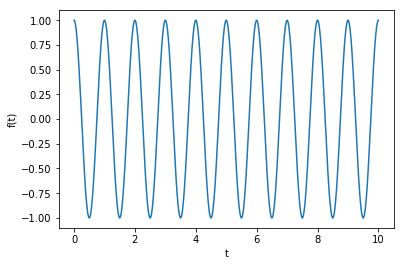

In [7]:
# Time axis
t = np.linspace(0, 10, int(10/0.01) + 1) #timestamps from 0 to 10, period of T=0.01
plot(t, f(t))
xlabel('t')
ylabel('f(t)')

### Question 2:  More Sampling

Let's sample the signal from the previous question $f$ with sampling period $\Delta_m = \frac{1}{4}$s and
$\Delta_n = 1$s and perform sinc interpolation on the resulting samples.
Let the reconstructed functions be $g_m$ and $g_n$.

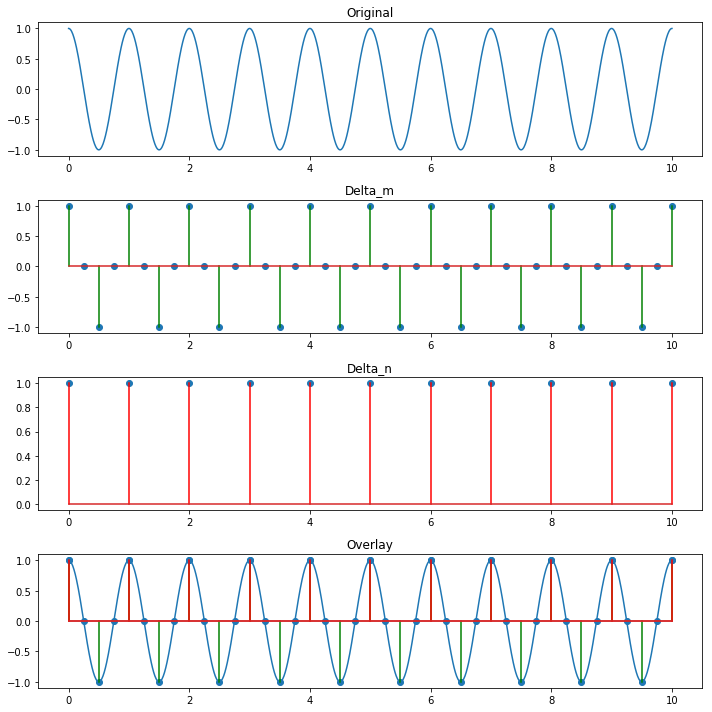

In [8]:
Delta_m = 1.0/4.0
Delta_n = 1
t_m = np.linspace(0, 10, int(10/Delta_m) + 1)
samples_m = f(t_m)
t_n = np.linspace(0, 10, int(10/Delta_n) + 1)
samples_n = f(t_n)

fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(10, 10)
plt.subplot(4, 1, 1)
plot(t, f(t))
title('Original')
plt.subplot(4, 1, 2)
stem(t_m, samples_m, 'g')
title('Delta_m')
plt.subplot(4, 1, 3)
stem(t_n, samples_n, 'r')
title('Delta_n')
plt.subplot(4, 1,  4)
plot(t, f(t))
stem(t_m, samples_m, 'g')
stem(t_n, samples_n, 'r')
title('Overlay')
fig.tight_layout()

- Have we staisfied the Nyquist limit (i.e. the sampling theorem) in any case?
- What is the highest frequency we can reconstruct with the sampling rate $\Delta_n$?
- Based on this answer, can you think of any periodic function that has a frequencies less than or equal to $\pi$ that samples the same as $g_n$?

### Solutions
- $\Delta_m$ satisfies Nyquist. $\Delta_n$ does not.
- The sinc functions used to reconstruct $g_n$ is, $$\left\{\text{sinc}\left(\frac{x - k}{1}\right)\right\}_{k \in \mathbb{Z}}.$$ 
These functions can represent a maximum frequency of $\pi$.
- Since the frequencies vary from $0$ to $\pi$, the smallest period that can be represented is $2$. That is to say, functions of period $<2$ cannot be captured with the sinc function derived from $\Delta_n$. Since the period must be greater than $2$, no sine or cosin function can give the same samples as $g_n$. This means suggests looking into a fairly trivial kind of periodic function: a constant. In particular, the answer to this problem is the constant function that is $1$ everywhere.

### Question 3: Aliasing

Consider the signal $f(x) = sin(0.2\pi x)$.
- At what period T should we sample so that sinc interpolation recovers a function that is identically zero?
- At what period T should we sample so that sinc interpolation recovers the function $g(x) = -\sin\left(\frac{\pi}{15}x\right)$?

### Solutions

- We want to sample such that our resultant discrete time signal is all zeros. To do this, we can sample at $x = 5k$, for integral values of k. Hence, T = 5. 
- T = 7.5
\begin{align*}
    f[n] & = \sin(0.2\pi nT) && \text{sampling f(x)}\\
          & = \cos(0.2\pi nT-\frac{\pi}{2}) && \sin(x)=\cos(x-\frac{\pi}{2})\\
          & = \cos(2\pi n - (0.2\pi nT-\frac{\pi}{2})) && \cos(x)=\cos(2\pi-x)\\
          & = \cos((2\pi - 0.2\pi T)n+\frac{\pi}{2}) && \\
          & = -\sin((2\pi - 0.2\pi T)n) && -\sin(x)=\cos(x+\frac{\pi}{2}) \\
          & = -\sin(\frac{\pi}{15}nT) && \text{equivalent to sampling g(x)} \\
    2\pi - 0.2\pi T & = \frac{\pi}{15}T && \\
    T &= 7.5 && \\
\end{align*}

### Fun extra
Aliasing effect with camera.

In [9]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" \
     src="https://www.youtube.com/embed/ByTsISFXUoY?rel=0" frameborder="0" allowfullscreen></iframe>')

The smear effect on the propellor is due to another distortion effect called "rolling shutter". You can find many interesting videos on this online!